# **Hate Speech Detection**

1814038 - Vishant Mehta

1814040 - Nishavak Naik

1814041 - Vighnesh Naik

In [ ]:
import re

import nltk
import numpy as np
import pandas as pd
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train['label'] = train['label'].astype('category')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      31962 non-null  int64   
 1   label   31962 non-null  category
 2   tweet   31962 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 530.8+ KB


# Processing tweets

<ol>
<li>Removal of any <u>special character</u></li>
<li><u>Lemmatization</u> of tweets</li>
<li>Removal of <u>stopwords</u></li>
</ol>

Lemmatization:

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

In [ ]:
train['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'v') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in train['tweet']]
train['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'n') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in train['tweet_processed']]
train['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'a') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in train['tweet_processed']]

test['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'v') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in test['tweet']]
test['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'n') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in test['tweet_processed']]
test['tweet_processed'] = [' '.join([WordNetLemmatizer().lemmatize(w, 'a') for w in (' '.join((''.join([re.sub('[^A-Za-z ]','',word) for word in row])).split())).split()]) for row in test['tweet_processed']]

In [ ]:
train.head()

,id,label,tweet,tweet_processed
0,1,0,@user when a father is dysfunctional and is s...,user when a father be dysfunctional and be so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank for lyft credit i cant use cau...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
stop_words = set(stopwords.words('english'))
train['tweet_processed'] = [' '.join([w for w in row.split() if not w.lower() in stop_words]) for row in train['tweet_processed']]
test['tweet_processed'] = [' '.join([w for w in row.split() if not w.lower() in stop_words]) for row in test['tweet_processed']]

In [ ]:
train.head()

,id,label,tweet,tweet_processed
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit cant use cause don...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train['tweet_processed'],train['label'])

In [ ]:
vect = TfidfVectorizer(ngram_range = (1,4)).fit(X_train)

In [ ]:
vect_transformed_X_train = vect.transform(X_train)
vect_transformed_X_test = vect.transform(X_test)

F1 score is used as an evaluation measure as, when the data is skewed like in this case, where the number of hate speech tweets are very less, accuracy cannot be relied upon.

The F1 score can be interpreted as a weighted average of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
modelSVC = SVC(C=100).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsSVC = modelSVC.predict(vect_transformed_X_test)
sum(predictionsSVC==1),len(y_test),f1_score(y_test,predictionsSVC)

(319, 7991, 0.6299765807962528)

In [ ]:
modelLR = LogisticRegression(C=100).fit(vect_transformed_X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictionsLR = modelLR.predict(vect_transformed_X_test)
sum(predictionsLR==1),len(y_test),f1_score(y_test,predictionsLR)

(425, 7991, 0.6916666666666667)

In [ ]:
modelNB = MultinomialNB(alpha=1.7).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsNB = modelNB.predict(vect_transformed_X_test)
sum(predictionsNB==1),len(y_test),f1_score(y_test,predictionsNB)

(62, 7991, 0.20770519262981574)

In [ ]:
modelRF = RandomForestClassifier(n_estimators=20).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsRF = modelRF.predict(vect_transformed_X_test)
sum(predictionsRF==1),len(y_test),f1_score(y_test,predictionsRF)

(234, 7991, 0.5591677503250976)

In [ ]:
modelSGD = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3).fit(vect_transformed_X_train,y_train)

In [ ]:
predictionsSGD = modelSGD.predict(vect_transformed_X_test)
sum(predictionsSGD==1),len(y_test),f1_score(y_test,predictionsSGD)

(30, 7991, 0.10619469026548672)

Based on all the above models trained we conclude that the logistic regression (C=100) is the better model amoung them, ergo, we use this model as our final model.

In [ ]:
vect = TfidfVectorizer(ngram_range = (1,4)).fit(train['tweet_processed'])
vect_transformed_train = vect.transform(train['tweet_processed'])
vect_transformed_test = vect.transform(test['tweet_processed'])

In [ ]:
FinalModel = LogisticRegression(C=100).fit(vect_transformed_train,train['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions = FinalModel.predict(vect_transformed_test)

In [ ]:
submission = pd.DataFrame({'id':test['id'],'label':predictions})

In [ ]:
file_name = 'test_predictions.csv'
submission.to_csv(file_name,index=False)

Results

In [ ]:
def getConfusionMatrix(pred, true, title):
  # computing confusion matrix
  cf_matrix = confusion_matrix(true, pred)
  group_names = ["TN", "FP", "FN", "TP"]
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = [
      "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
  ]

  labels = [
      f"{v1}\n{v2}\n{v3}"
      for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
  ]
  labels = np.asarray(labels).reshape(2, 2)

  # computing evaluation metrics
  accuracy = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1, 1] / sum(cf_matrix[:, 1])
  specificity= cf_matrix[0, 0] / sum(cf_matrix[0,:])
  recall = cf_matrix[1, 1] / sum(cf_matrix[1, :])


  f1_score = 2 * precision * recall / (precision + recall)
  stats_text = "\nAccuracy={:0.3f}; Precision={:0.3f}; Recall={:0.3f}; Specificity={:0.3f}; F1 Score={:0.3f}\n".format(
      accuracy, precision, recall, specificity, f1_score
  )


  # plotting the confusion matrix, evaluation metrics and heatmap
  ax = sns.heatmap(cf_matrix, annot=labels, fmt="")
  # ax.set_title('Confusion Matrix - ' + title + '\n' + stats_text)
  plt.suptitle("Confusion Matrix - " + title, y=1.05, weight='black', fontsize=24)
  plt.title(stats_text)
  plt.savefig(title + '.png', bbox_inches='tight')

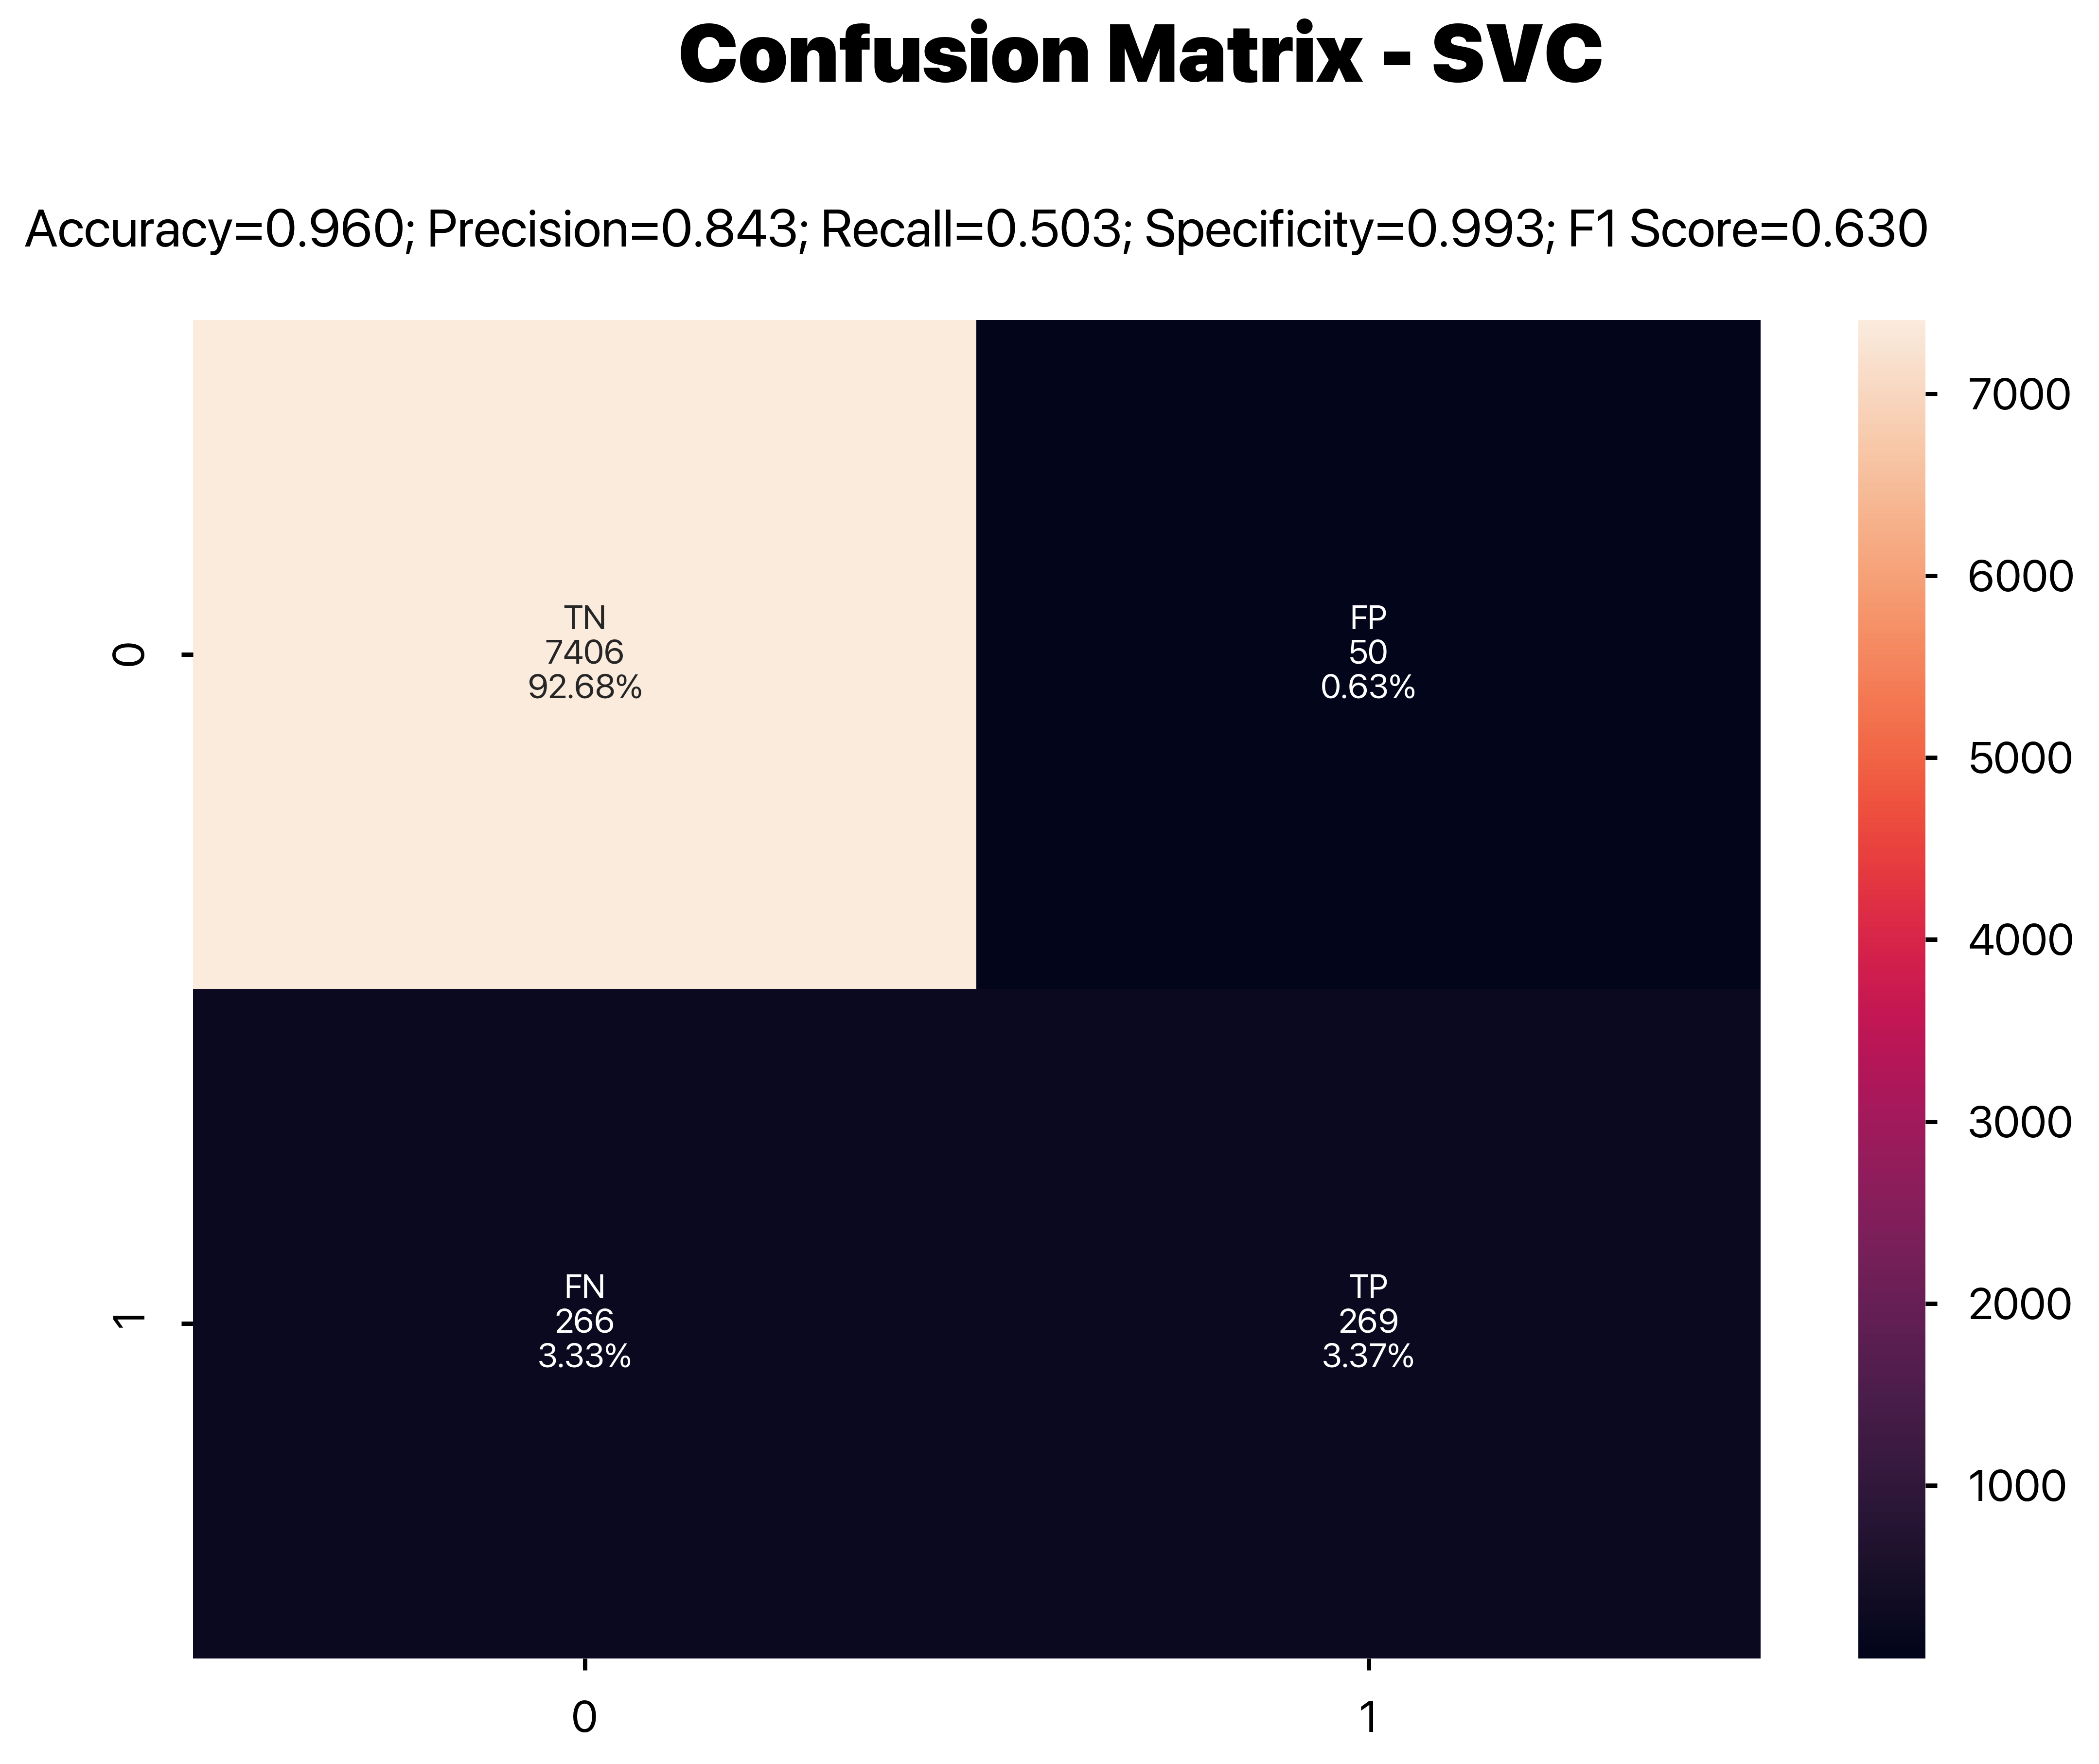

In [ ]:
getConfusionMatrix(pred=predictionsSVC, true=y_test, title='SVC')

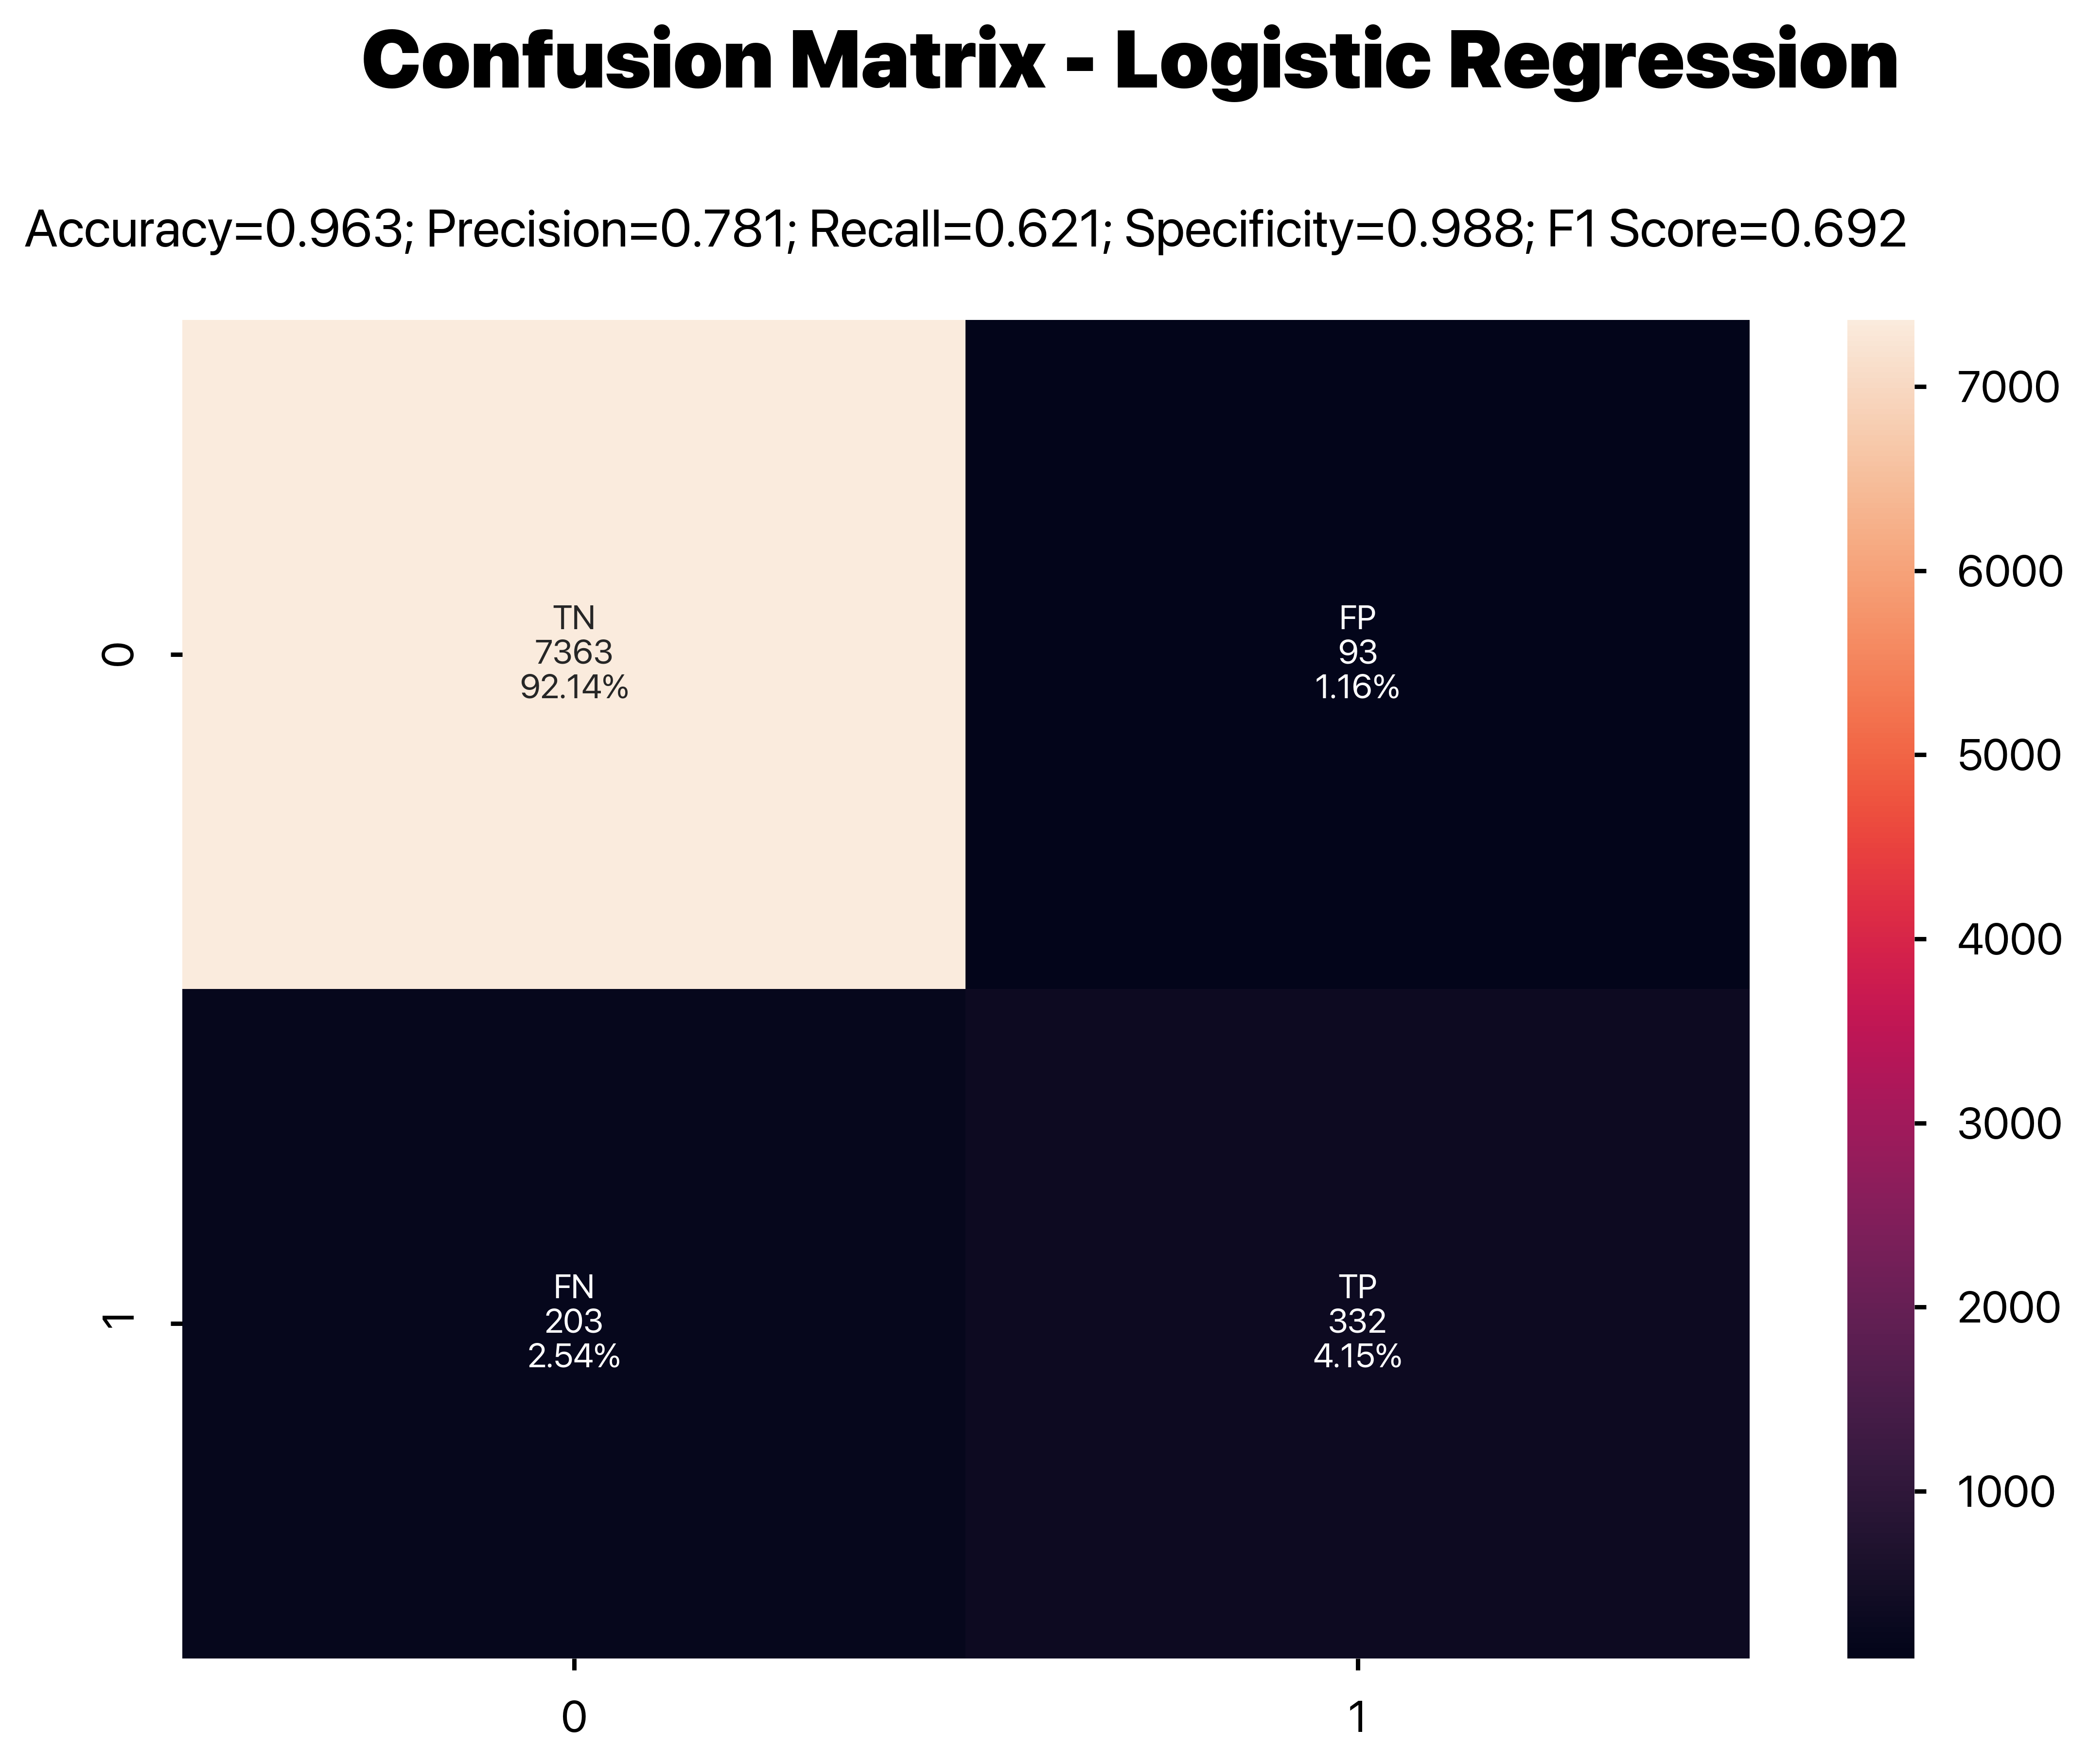

In [ ]:
getConfusionMatrix(pred=predictionsLR, true=y_test, title='Logistic Regression')

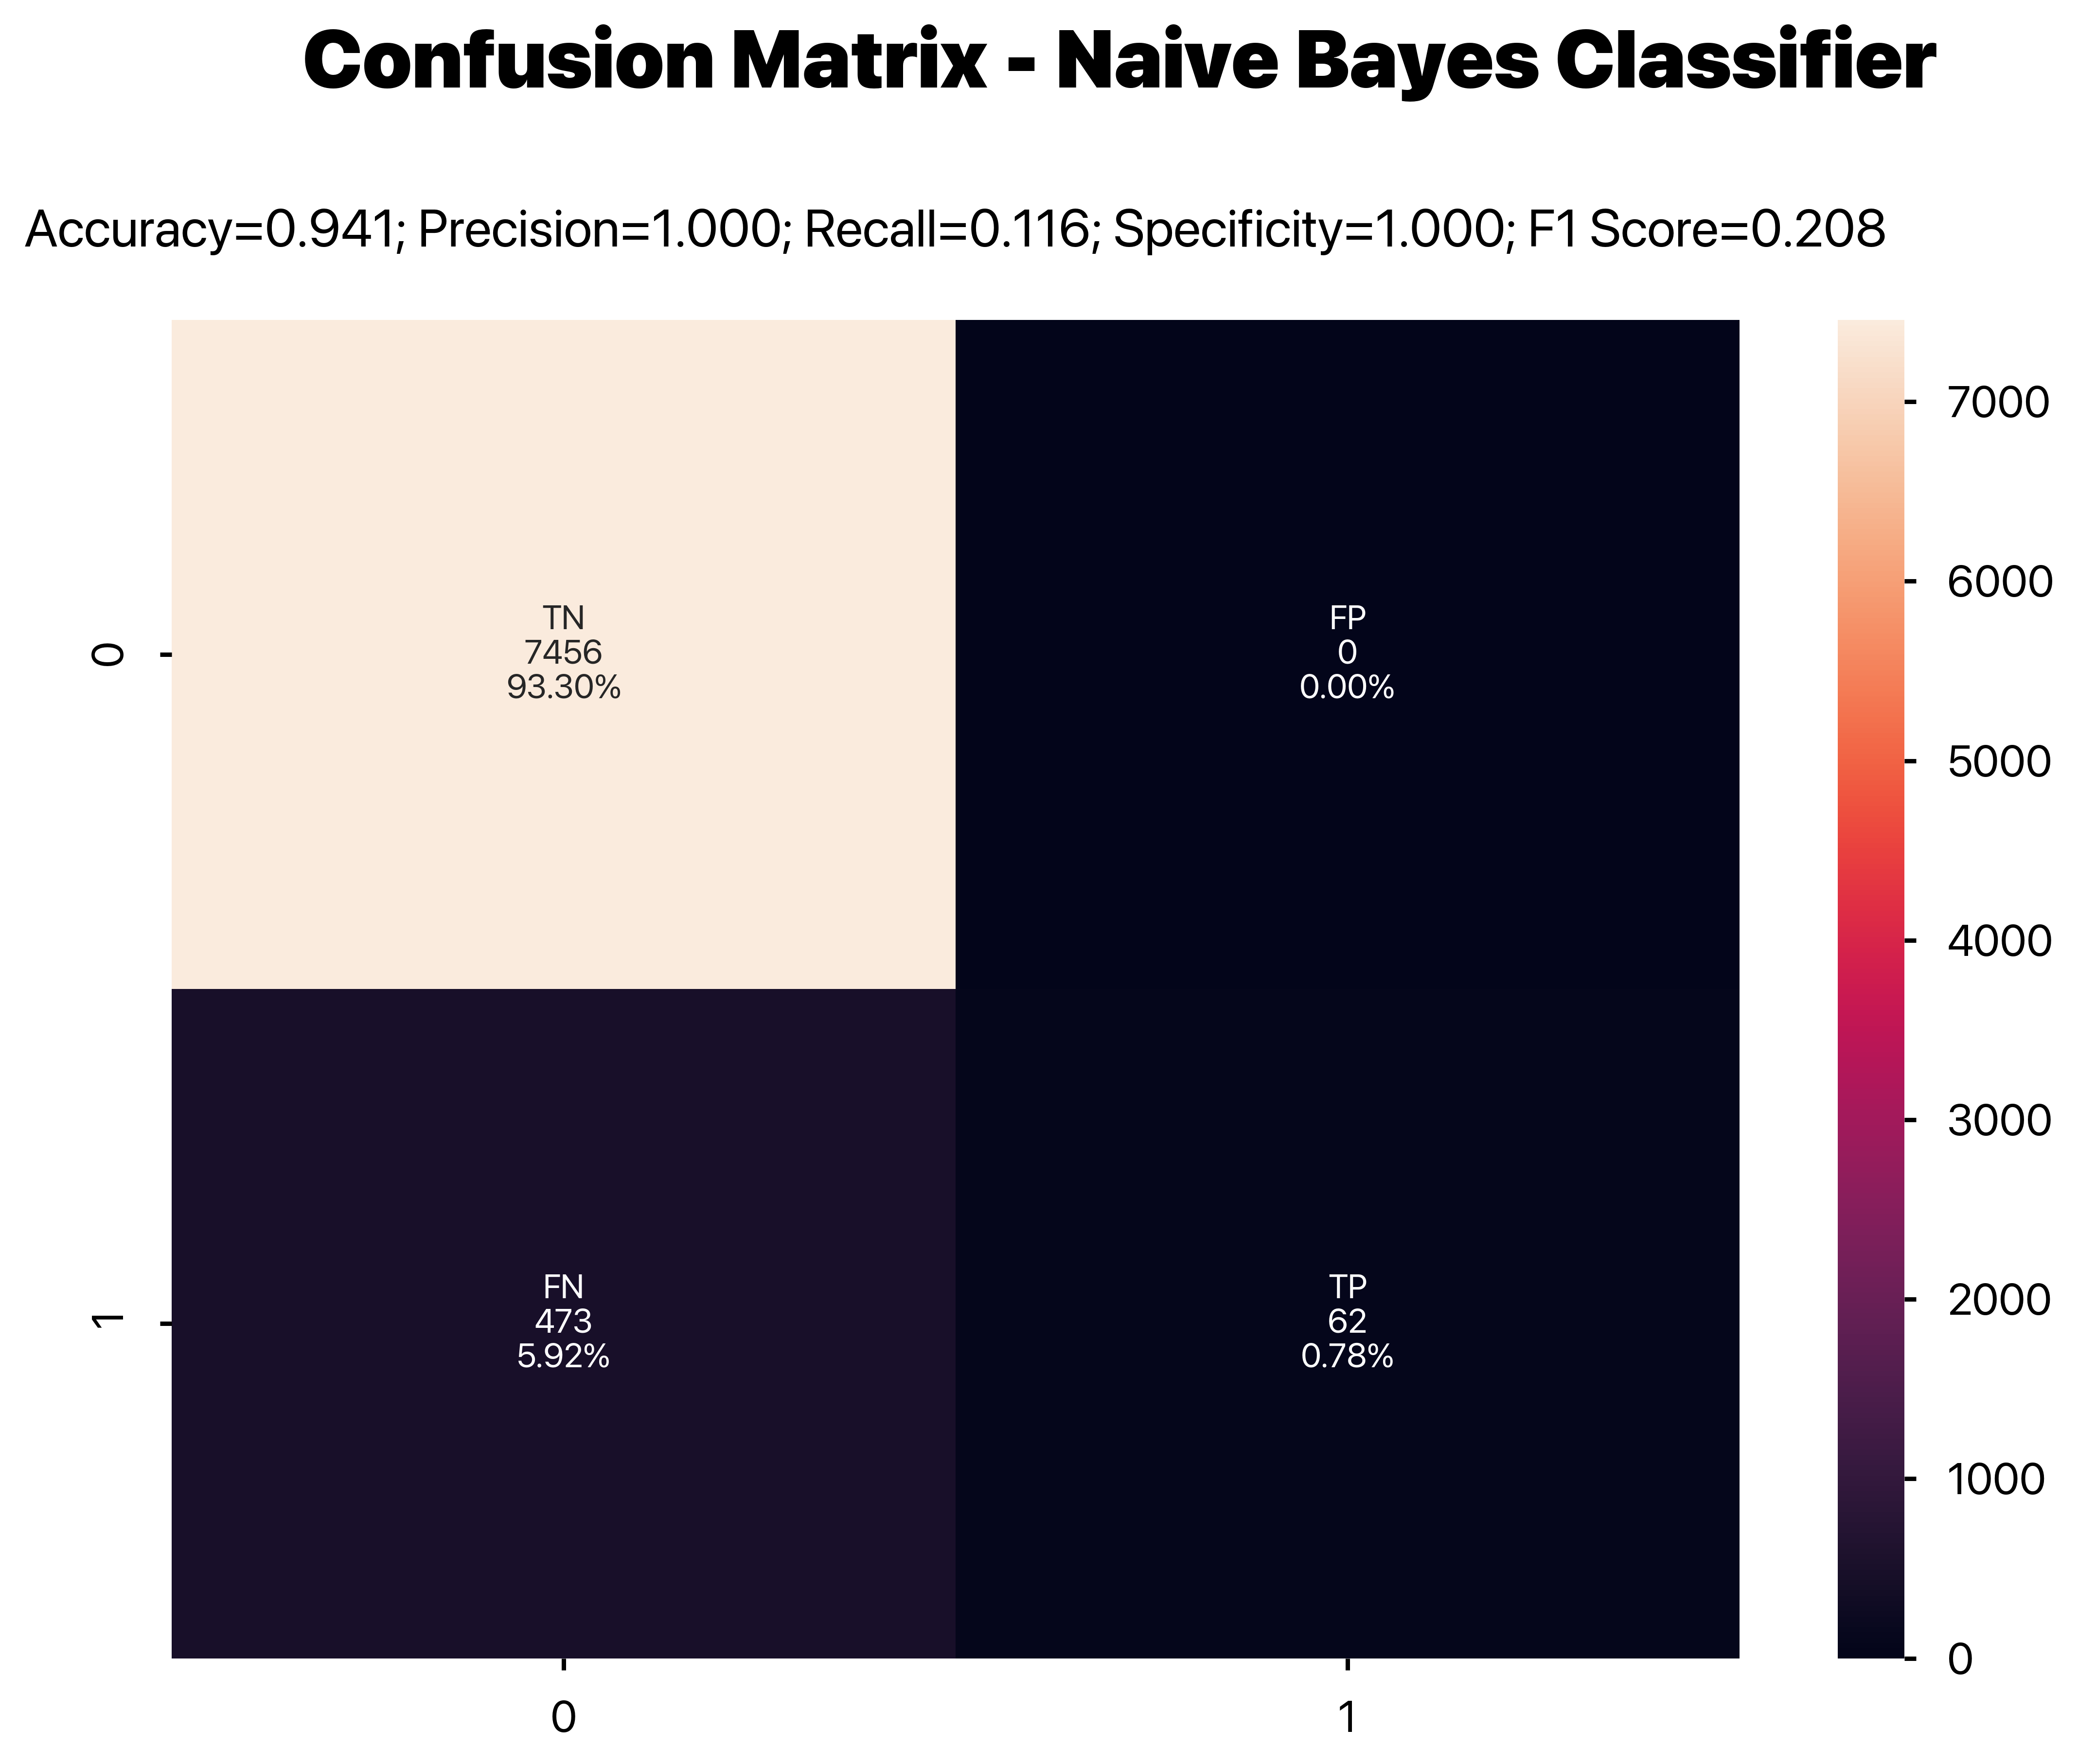

In [ ]:
getConfusionMatrix(pred=predictionsNB, true=y_test, title='Naive Bayes Classifier')

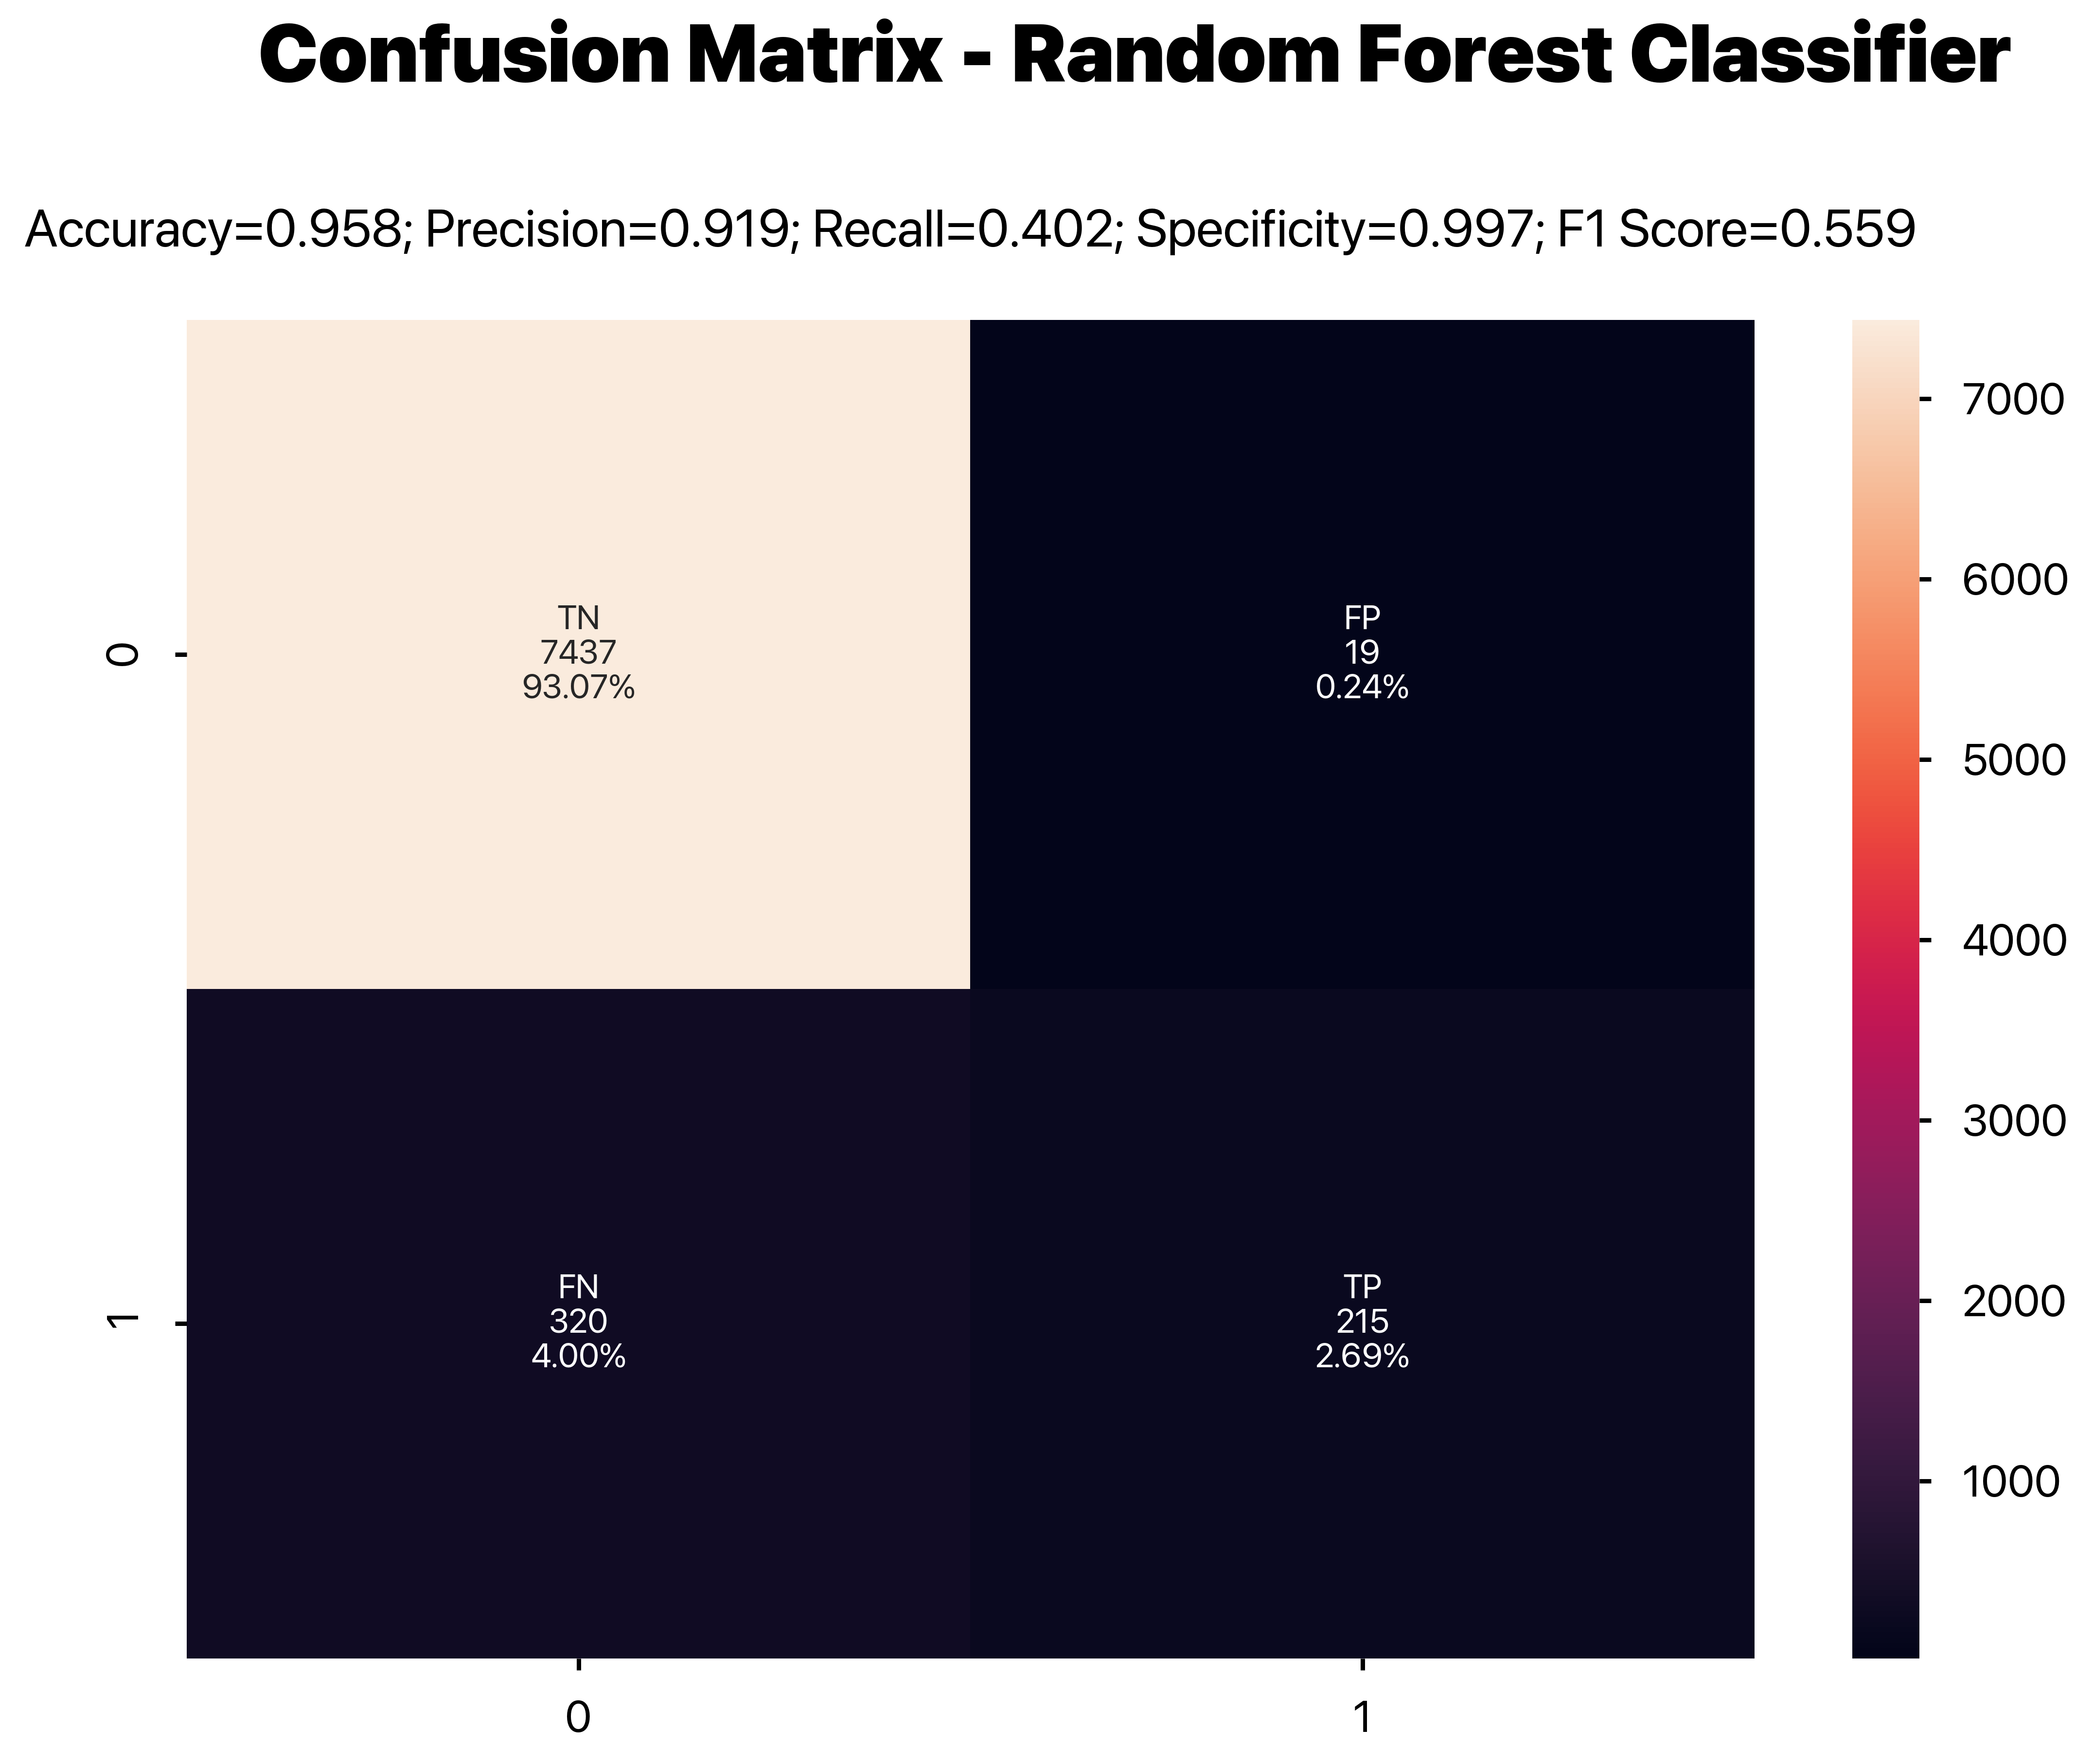

In [ ]:
getConfusionMatrix(pred=predictionsRF, true=y_test, title='Random Forest Classifier')

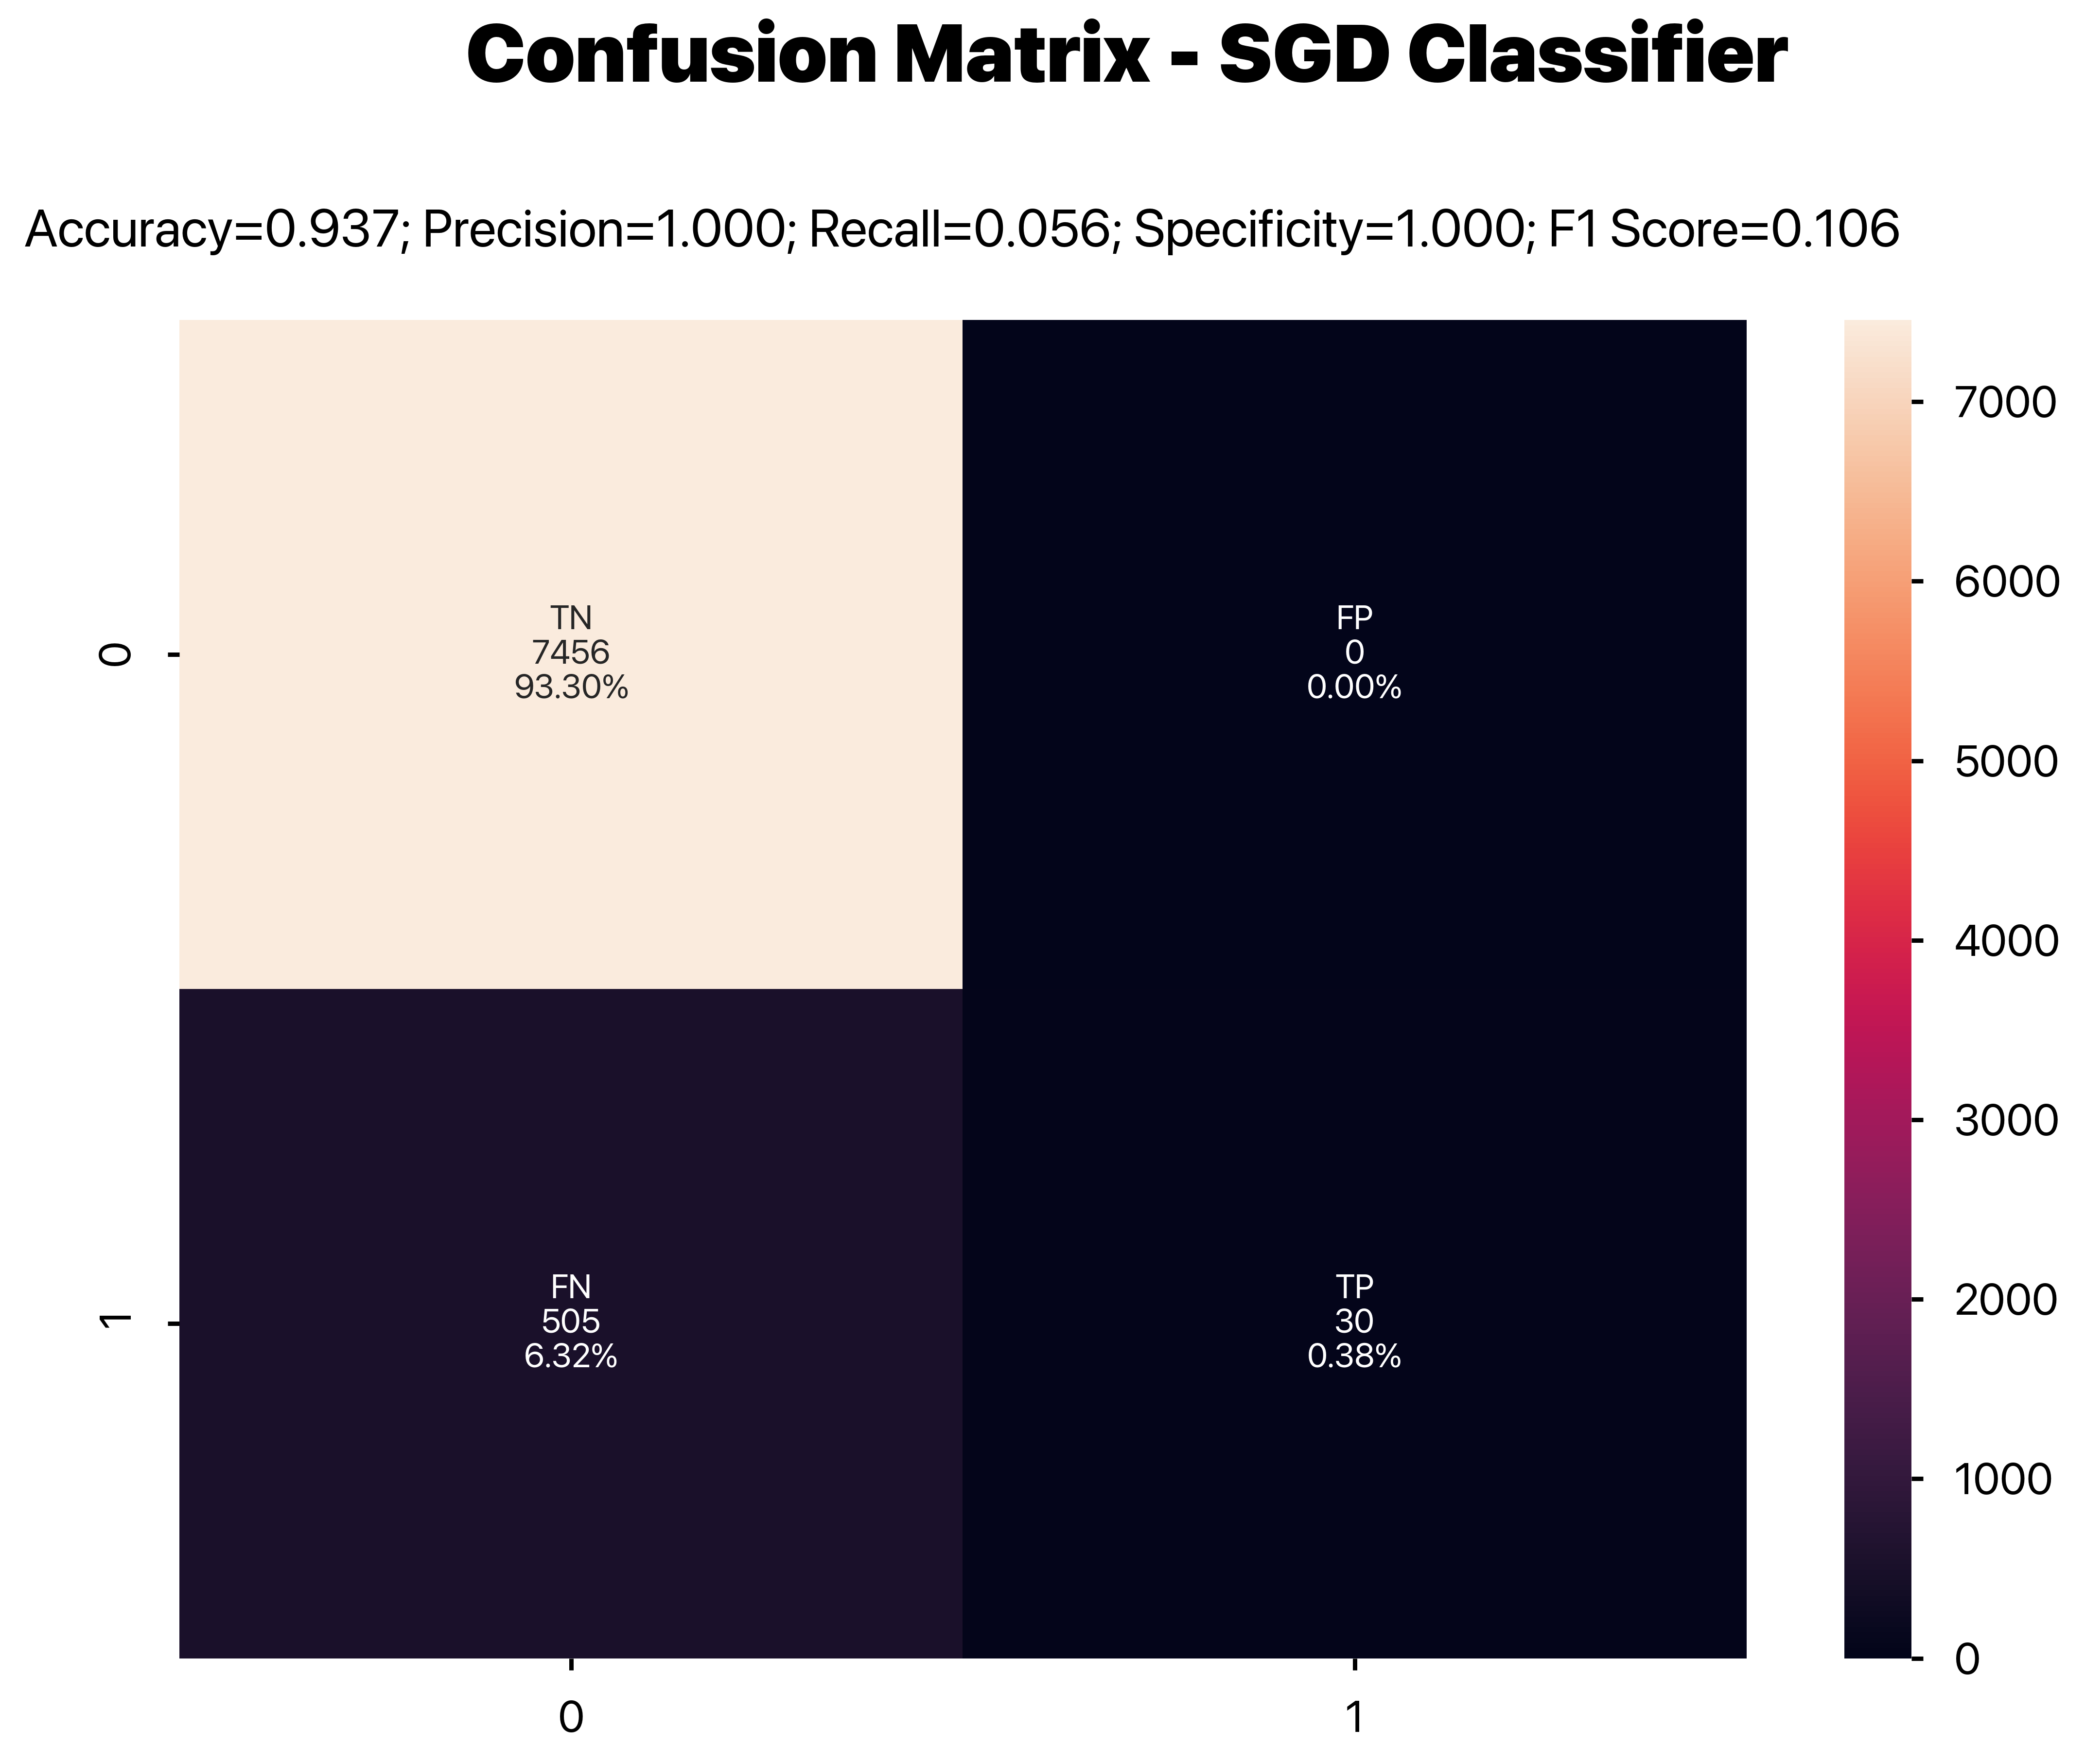

In [ ]:
getConfusionMatrix(pred=predictionsSGD, true=y_test, title='SGD Classifier')